In [3]:
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [4]:
df = pd.read_csv(r"D:\Mtrx\income_evaluation.csv")

In [5]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


c:\Users\arzuh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


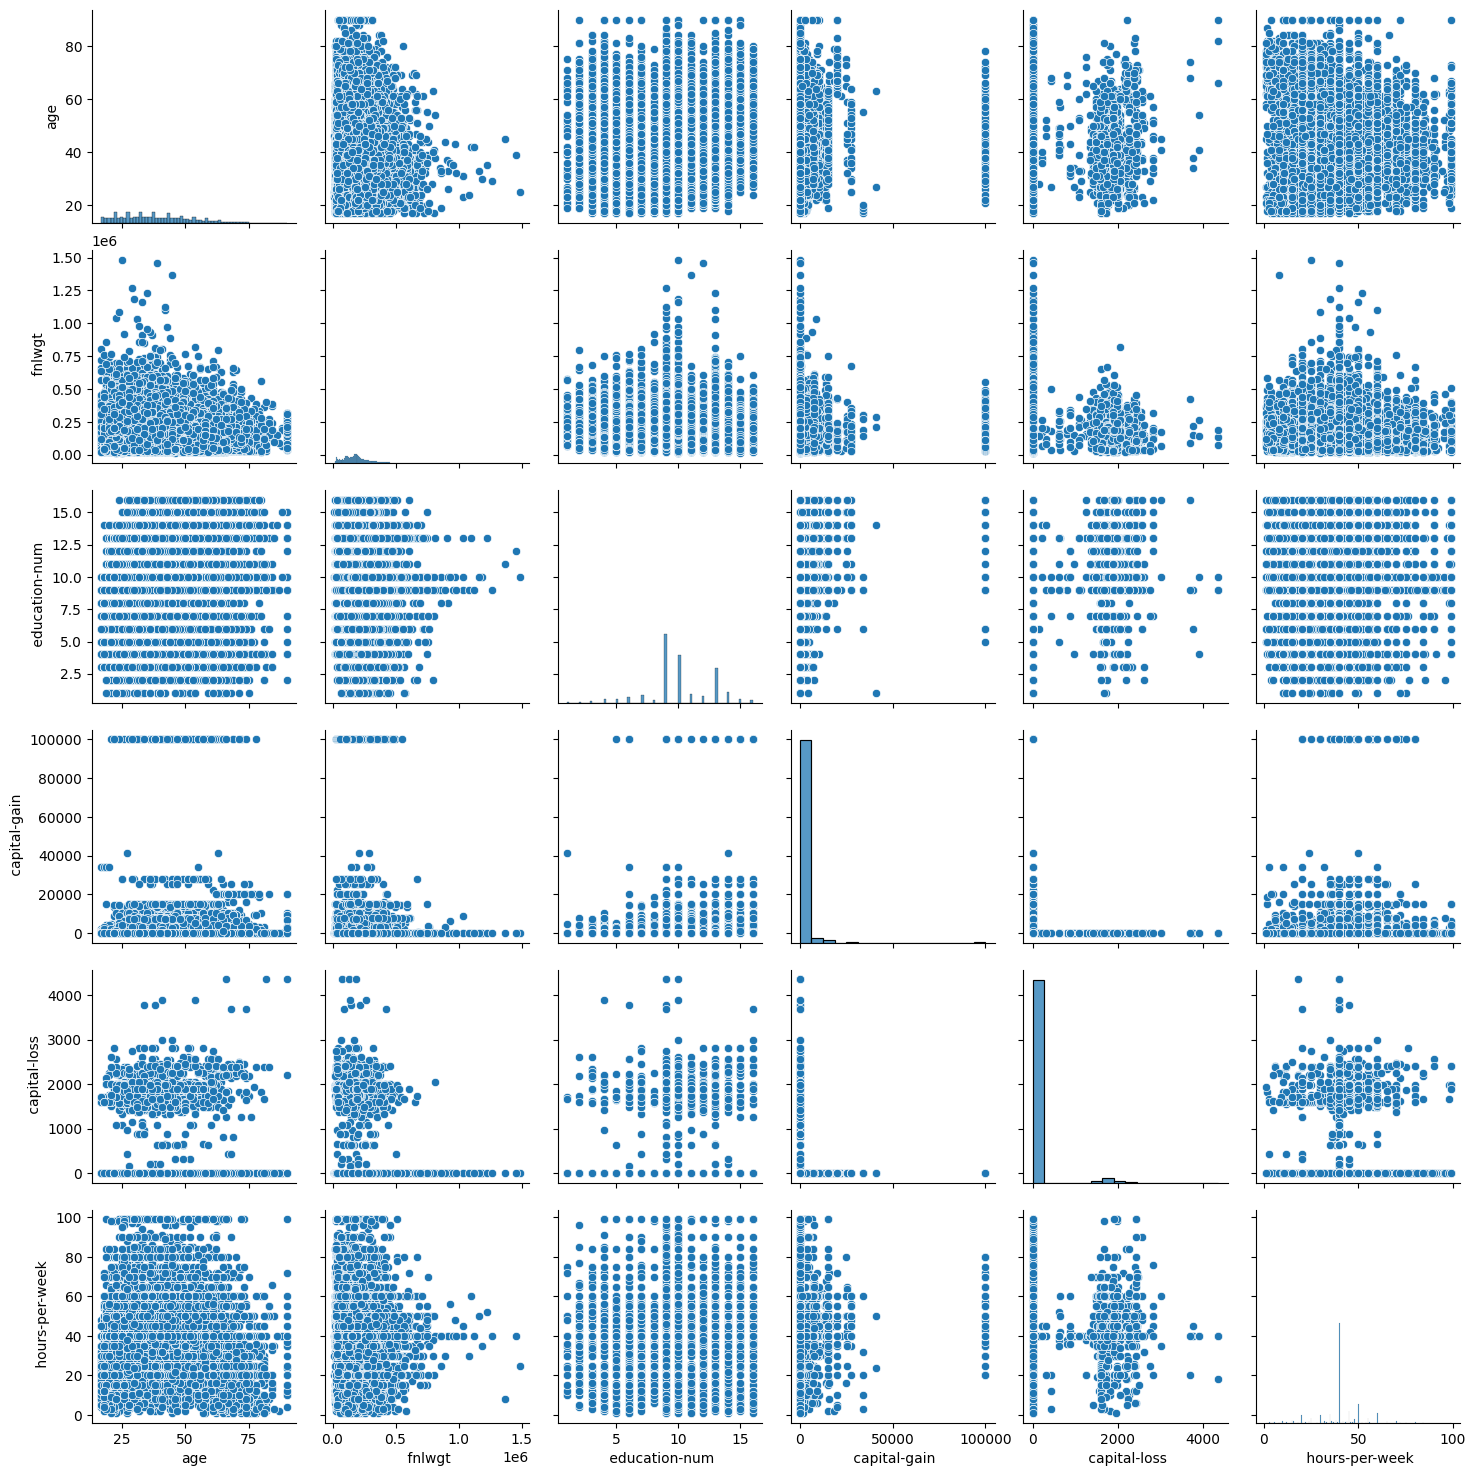

In [8]:
sns.pairplot(df)

In [9]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [10]:
df.columns = df.columns.str.strip().str.replace(' ', '_')
df.columns = df.columns.str.strip().str.replace('-', '_')
df.columns = df.columns.str.lower()
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [11]:
df['capital_gain'].value_counts()

capital_gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: count, Length: 119, dtype: int64

In [12]:
df['capital_loss'].value_counts()

capital_loss
0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: count, Length: 92, dtype: int64

In [13]:
df["income"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [14]:
binary_labels = []
for i in df["income"]:
    if i ==' <=50K' :
        binary_labels.append(0)
    elif i ==' >50K' :
        binary_labels.append(1)
df["income"] = binary_labels
df["income"] 

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

In [15]:
df.income.value_counts()

income
0    24720
1     7841
Name: count, dtype: int64

In [16]:
df['hours_per_week'].value_counts()

hours_per_week
40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: count, Length: 94, dtype: int64

In [17]:
df[['education', 'education_num']]

,education,education_num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
...,...,...
32556,Assoc-acdm,12
32557,HS-grad,9
32558,HS-grad,9
32559,HS-grad,9


In [18]:
df[['marital_status', 'relationship']]

,marital_status,relationship
0,Never-married,Not-in-family
1,Married-civ-spouse,Husband
2,Divorced,Not-in-family
3,Married-civ-spouse,Husband
4,Married-civ-spouse,Wife
...,...,...
32556,Married-civ-spouse,Wife
32557,Married-civ-spouse,Husband
32558,Widowed,Unmarried
32559,Never-married,Own-child


In [19]:
df['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [20]:
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [21]:
df1 = df.drop(['fnlwgt','education','marital_status', 'capital_gain', 'capital_loss' ], axis = 1)
df1

,age,workclass,education_num,occupation,relationship,race,sex,hours_per_week,native_country,income
0,39,State-gov,13,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,13,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,9,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,7,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,13,Prof-specialty,Wife,Black,Female,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Tech-support,Wife,White,Female,38,United-States,0
32557,40,Private,9,Machine-op-inspct,Husband,White,Male,40,United-States,1
32558,58,Private,9,Adm-clerical,Unmarried,White,Female,40,United-States,0
32559,22,Private,9,Adm-clerical,Own-child,White,Male,20,United-States,0


In [22]:
df["workclass"].unique()
#one hot encoding

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [23]:
df['workclass'].value_counts()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [24]:
df['native_country'].value_counts()
df['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [25]:
df['occupation'].value_counts()
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [26]:
df["race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [27]:
df["sex"].unique()

array([' Male', ' Female'], dtype=object)

In [28]:
df1["relationship"].value_counts()

relationship
 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: count, dtype: int64

In [29]:
filtered_rows = df[(df['occupation'] == ' ?') | (df['workclass'] == ' ?')| (df['native_country'] == ' ?')]
filtered_rows

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,1
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,1
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,1
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,0
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,1
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,0
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,1
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,0


In [30]:
df1 = df1[((df1['occupation'] != ' ?') & (df1['workclass'] != ' ?')&(df1['native_country'] != ' ?'))]

In [31]:
df1["workclass"].value_counts()

workclass
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: count, dtype: int64

In [32]:
df1["occupation"].value_counts()

occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: count, dtype: int64

In [33]:
df1["native_country"].value_counts()

native_country
 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                

In [34]:
df1

,age,workclass,education_num,occupation,relationship,race,sex,hours_per_week,native_country,income
0,39,State-gov,13,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,13,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,9,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,7,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,13,Prof-specialty,Wife,Black,Female,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Tech-support,Wife,White,Female,38,United-States,0
32557,40,Private,9,Machine-op-inspct,Husband,White,Male,40,United-States,1
32558,58,Private,9,Adm-clerical,Unmarried,White,Female,40,United-States,0
32559,22,Private,9,Adm-clerical,Own-child,White,Male,20,United-States,0


In [35]:
df["education"].unique()
#label encoding

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [36]:
df['education']= df['education'].str.strip().str.replace(' ', '')
df["education"].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [37]:
df['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [38]:
pd.set_option('display.max_columns', None)

In [39]:
sex_encoded = pd.get_dummies(df1['sex'],drop_first=True)



In [40]:
sex_encoded= (sex_encoded).astype(int)


In [41]:
df1.drop(["sex"], axis=1 , inplace = True)

C:\Users\arzuh\AppData\Local\Temp\ipykernel_1564\143964729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(["sex"], axis=1 , inplace = True)


In [42]:
df1 =  pd.concat([df1, sex_encoded], axis=1)

In [43]:
df["race"].value_counts()

race
 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: count, dtype: int64

In [44]:
race_encoded = pd.get_dummies(df1['race'],drop_first=True)
race_encoded= (race_encoded).astype(int)
df1.drop(["race"], axis=1 , inplace = True)
df1 =  pd.concat([df1, race_encoded], axis=1)

In [45]:
relationship_encoded = pd.get_dummies(df1['relationship'])
relationship_encoded= (relationship_encoded).astype(int)
df1.drop(["relationship"], axis=1 , inplace = True)
df1 =  pd.concat([df1, relationship_encoded], axis=1)

In [46]:
native_country_encoded = pd.get_dummies(df1['native_country'])
native_country_encoded= (native_country_encoded).astype(int)
df1.drop(["native_country"], axis=1 , inplace = True)
df1 =  pd.concat([df1, native_country_encoded], axis=1)

In [47]:
occupation_encoded = pd.get_dummies(df1['occupation'])
occupation_encoded= (occupation_encoded).astype(int)
df1.drop(["occupation"], axis=1 , inplace = True)
df1 =  pd.concat([df1, occupation_encoded], axis=1)

In [48]:
workclass_encoded = pd.get_dummies(df1['workclass'])
workclass_encoded= (workclass_encoded).astype(int)
df1.drop(["workclass"], axis=1 , inplace = True)
df1 =  pd.concat([df1, workclass_encoded], axis=1)

In [49]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [50]:
df1

,age,education_num,hours_per_week,income,Male,Asian-Pac-Islander,Black,Other,White,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,39,13,40,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,50,13,13,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,9,40,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,53,7,40,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,28,13,40,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,38,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
32557,40,9,40,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32558,58,9,40,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32559,22,9,20,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [51]:
df1

,age,education_num,hours_per_week,income,Male,Asian-Pac-Islander,Black,Other,White,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,39,13,40,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,50,13,13,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,9,40,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,53,7,40,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,28,13,40,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,38,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
32557,40,9,40,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32558,58,9,40,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32559,22,9,20,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   age                          30162 non-null  int64
 1   education_num                30162 non-null  int64
 2   hours_per_week               30162 non-null  int64
 3   income                       30162 non-null  int64
 4    Male                        30162 non-null  int32
 5    Asian-Pac-Islander          30162 non-null  int32
 6    Black                       30162 non-null  int32
 7    Other                       30162 non-null  int32
 8    White                       30162 non-null  int32
 9    Husband                     30162 non-null  int32
 10   Not-in-family               30162 non-null  int32
 11   Other-relative              30162 non-null  int32
 12   Own-child                   30162 non-null  int32
 13   Unmarried                   30162 non-null  int32


In [53]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [54]:
df1.income.value_counts()

income
0    22654
1     7508
Name: count, dtype: int64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop('income',axis=1), 
           df1['income'], test_size=0.3, 
            random_state=42)

In [56]:
from sklearn.linear_model import LogisticRegression #create an instance and fit the model 
logmodel = LogisticRegression(max_iter = 100000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [67]:
predicted = logmodel.predict(X_test)
predicted

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [68]:
predictions_proba = logmodel.predict_proba(X_test)

In [69]:
predictions_proba

array([[0.58384575, 0.41615425],
       [0.74215591, 0.25784409],
       [0.71112256, 0.28887744],
       ...,
       [0.3908111 , 0.6091889 ],
       [0.96355111, 0.03644889],
       [0.85565674, 0.14434326]])

In [70]:
predictions_proba.shape

(9049, 2)

In [71]:
second_elements = predictions_proba[:, 1]

In [72]:
second_elements

array([0.41615425, 0.25784409, 0.28887744, ..., 0.6091889 , 0.03644889,
       0.14434326])

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [74]:
cm2 = confusion_matrix(y_test,predicted)
score2 = accuracy_score(y_test,predicted)
cr2 = classification_report(y_test,predicted)
auc2 = roc_auc_score(y_test,predicted)

In [87]:
print('Confusion Matrix for  Logistic REgression:''\n',cm2 )
print('Accuracy Score for Logistic REgression:',score2 )
print('Classification Report for Logistic REgression:''\n''\n',cr2)
print('Auc Score for Logistic REgression:',auc2 )

Confusion Matrix for  Logistic REgression:
 [[2263 4504]
 [  91 2191]]
Accuracy Score for Logistic REgression: 0.49220908387667145
Classification Report for Logistic REgression:

               precision    recall  f1-score   support

           0       0.96      0.33      0.50      6767
           1       0.33      0.96      0.49      2282

    accuracy                           0.49      9049
   macro avg       0.64      0.65      0.49      9049
weighted avg       0.80      0.49      0.49      9049

Auc Score for Logistic REgression: 0.6472698615892172


In [76]:
from sklearn.naive_bayes import GaussianNB

In [77]:
NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)

GaussianNB()

In [78]:
predicted = NBmodel.predict(X_test)

In [79]:
predicted

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [80]:
predictions_proba = NBmodel.predict_proba(X_test)

In [81]:
predictions_proba

array([[5.07240362e-015, 1.00000000e+000],
       [4.72762171e-125, 1.00000000e+000],
       [2.81475913e-028, 1.00000000e+000],
       ...,
       [4.61255259e-016, 1.00000000e+000],
       [3.30776224e-012, 1.00000000e+000],
       [2.46257706e-015, 1.00000000e+000]])

In [82]:
second_elements = predictions_proba[:, 1]

In [83]:
second_elements

array([1., 1., 1., ..., 1., 1., 1.])

importance of columnsa bax.tetbiq ele telegramda linki var

Logistic regressionin da neticelerine bax


In [84]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [85]:
cm2 = confusion_matrix(y_test,predicted)
score2 = accuracy_score(y_test,predicted)
cr2 = classification_report(y_test,predicted)
auc2 = roc_auc_score(y_test,predicted)

In [86]:
print('Confusion Matrix for Naive Bayes:''\n',cm2 )
print('Accuracy Score for Naive Bayes:',score2 )
print('Classification Report for Naive Bayes:''\n''\n',cr2)
print('Auc Score for Naive Bayes:',auc2 )

Confusion Matrix for Naive Bayes:
 [[2263 4504]
 [  91 2191]]
Accuracy Score for Naive Bayes: 0.49220908387667145
Classification Report for Naive Bayes:

               precision    recall  f1-score   support

           0       0.96      0.33      0.50      6767
           1       0.33      0.96      0.49      2282

    accuracy                           0.49      9049
   macro avg       0.64      0.65      0.49      9049
weighted avg       0.80      0.49      0.49      9049

Auc Score for Naive Bayes: 0.6472698615892172


In [93]:
from sklearn.metrics import classification_report

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [94]:
y_pred = classifier.predict(X_test)

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [92]:
print('Confusion matrix ''\n',confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

NameError: name 'y_pred' is not defined